In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# observestion
# 1. sex= it is catagorical data
# 2. smoker =it is catagorycal data
# 3. region= catagorical data
# 4. bmi=continious data
# 5. age=continious data
# 6. charges= it is continious data & it is target values.

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# Target value is Charges & Input values are age,sex,bmi,children,smoker region

In [6]:
data.shape          # see the columne & row Number in dataset, Row=1338 nos, Columns= 7 nos

(1338, 7)

###  Cheking null value

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### replace the region cloumn with int.
# southeast  =  0
# southwest  =  1
# northwest  =  2
# northeast  =  3

In [9]:
data['region']=data['region'].replace({'southeast':0,'southwest':1,'northwest':2,'northeast':3})


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [11]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### fill object columns sex & smoker wtih int value
# sex column= female fill by 0 & male fill by 1
# smoker column=yes fill by 0 & No fill by 1

In [12]:
data['sex']=data['sex'].replace({'female':0,'male':1})

In [13]:
data['smoker']=data['smoker'].replace({'yes':0,'no':1})

### verify the dataset,it is fill by int number or not

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.795217,0.403694,0.0000,1.00000,1.000,1.000000,1.00000
region,1338.0,1.455157,1.130197,0.0000,0.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### checking how data is distributed

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

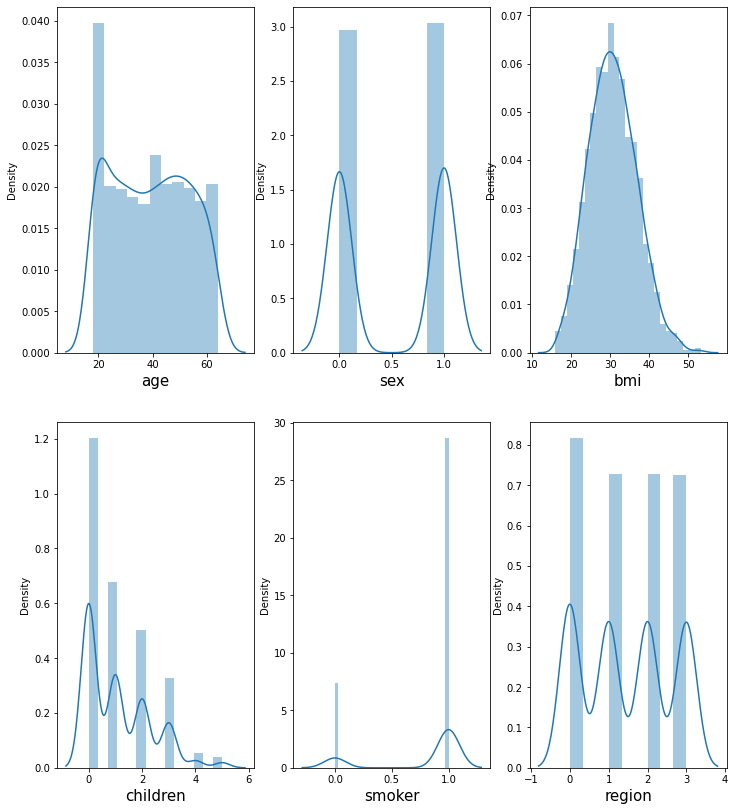

In [18]:
plt.figure(figsize=(12,14))
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.show()

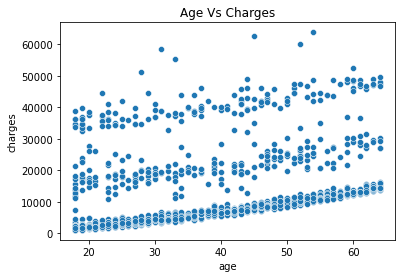

In [19]:
sns.scatterplot(data['age'],data['charges'])
plt.title('Age Vs Charges')
plt.show()

### Observation
. Data is normaly distributed


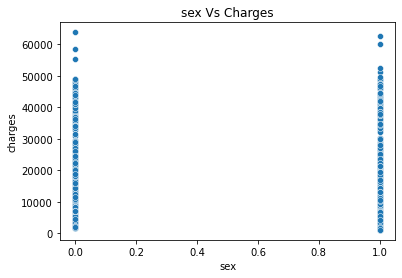

In [20]:
sns.scatterplot(data['sex'],data['charges'])
plt.title('sex Vs Charges')
plt.show()

### Observation

Data normaly equal distributed


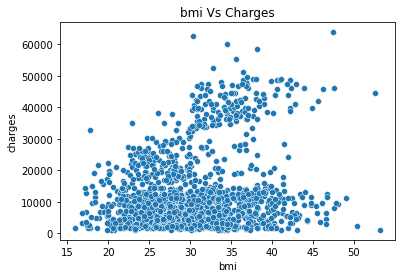

In [21]:
sns.scatterplot(data['bmi'],data['charges'])
plt.title('bmi Vs Charges')
plt.show()

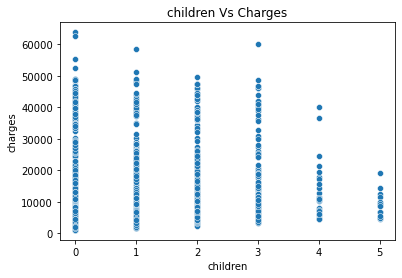

In [22]:
sns.scatterplot(data['children'],data['charges'])
plt.title('children Vs Charges')
plt.show()

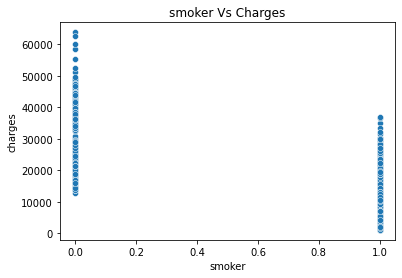

In [23]:
sns.scatterplot(data['smoker'],data['charges'])
plt.title('smoker Vs Charges')
plt.show()

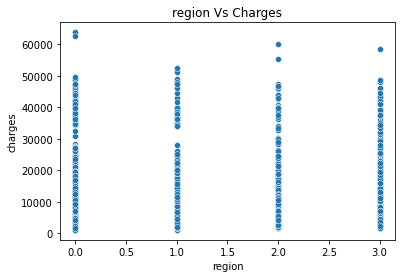

In [24]:
sns.scatterplot(data['region'],data['charges'])
plt.title('region Vs Charges')
plt.show()

In [25]:
# Observation
# all feature cloumns data narmal distributed.

### Cheking Outlier


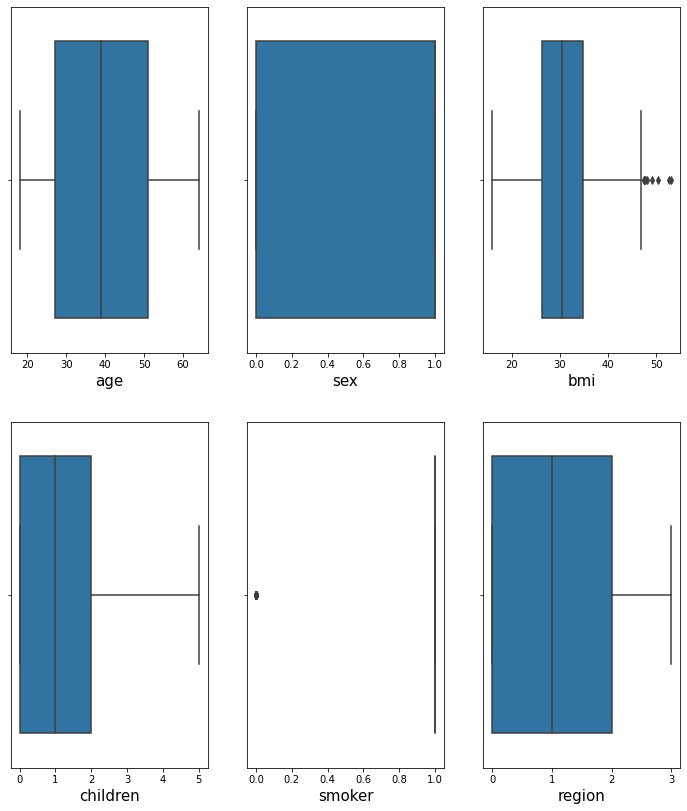

In [26]:
plt.figure(figsize=(12,14))
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.show()

In [27]:
# Observation
# 1. only bmi columns has outlier

#  Handaling the outlier

In [28]:
q3=data.quantile(0.75)

In [29]:
q1=data.quantile(0.25)

In [30]:
iqr=q3-q1

In [31]:
higher_side=q3+(1.5*iqr)

In [32]:
higher_pred=q3.bmi+(1.5*iqr.bmi)
higher_pred

47.290000000000006

In [33]:
index=np.where(data['bmi']>higher_pred)
index

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [34]:
data=data.drop(data.index[index])

In [35]:
data.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,0,1,16884.92400
1,1,18,1,33.770,1,1,0,1725.55230
2,2,28,1,33.000,3,1,0,4449.46200
3,3,33,1,22.705,0,1,2,21984.47061
4,4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,1,30.970,3,1,2,10600.54830
1325,1334,18,0,31.920,0,1,3,2205.98080
1326,1335,18,0,36.850,0,1,0,1629.83350
1327,1336,21,0,25.800,0,1,1,2007.94500


In [36]:
# Cheking correlation between feature & target value

In [37]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,0.024505,0.005787,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,-0.079854,-0.007394,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,0.002871,-0.253166,0.193196
children,0.043041,0.019281,0.017355,1.000000,-0.007577,-0.002285,0.069739
smoker,0.024505,-0.079854,0.002871,-0.007577,1.000000,0.036766,-0.785912
region,0.005787,-0.007394,-0.253166,-0.002285,0.036766,1.000000,-0.035093
charges,0.302022,0.063394,0.193196,0.069739,-0.785912,-0.035093,1.000000


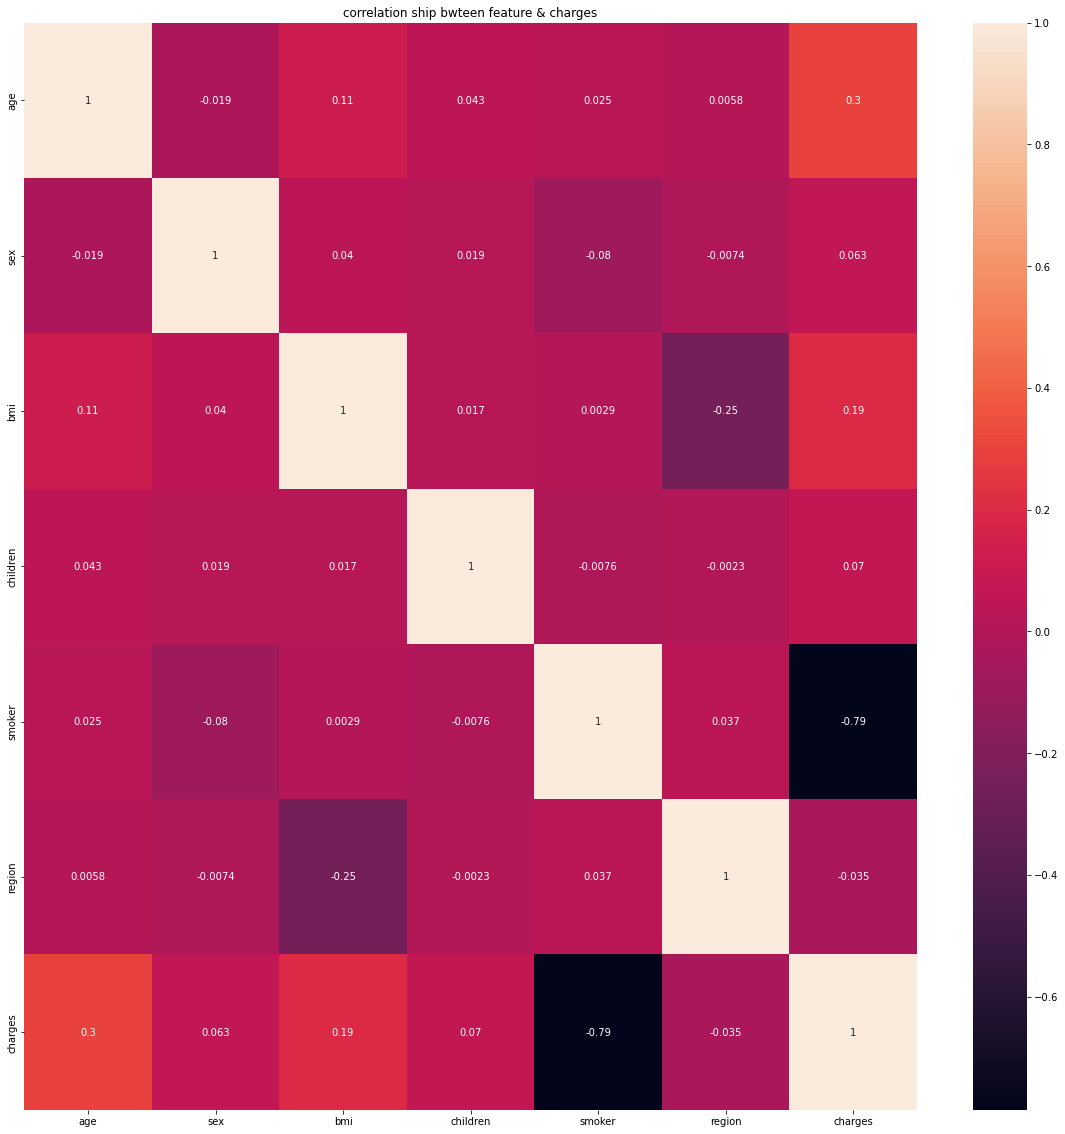

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,)
plt.title('correlation ship bwteen feature & charges')
plt.show()

In [39]:
# Obsevation
# 1. age= Good relation with charges variable as well as othes feature. age vs charges relation is 30% 
# 2. sex= Good relation with charges variable as well as othes feature. sex vs charges relation is 6.3%
# 3. bmi= Good relation with charges variable as well as othes feature. sex vs charges relation is 19%
# 4. children= Good relation with charges variable as well as othes feature. sex vs charges relation is 7%
# 5. smoker= Good relation with charges variable as well as othes feature. sex vs charges relation is (-) 79%.
# 6. region= Good relation with charges variable as well as othes feature. sex vs charges relation is (-) 3.5%

In [40]:
# separate both traget & feature variable with x variable & y variable
# x= fetaure variable
# y= target variable

In [41]:
x=data.drop(['charges'], axis=1)
y=data.charges

# Handaling the skewness

In [42]:
data.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker     -1.471424
region      0.041035
charges     1.500577
dtype: float64

In [43]:
from sklearn.preprocessing import power_transform,PowerTransformer

In [44]:
pt=PowerTransformer()

In [45]:
x_new=pt.fit_transform(x)

In [46]:
x=pd.DataFrame(x_new,columns=x.columns)

In [47]:
x.skew()

age        -0.099350
sex        -0.016573
bmi        -0.015725
children    0.106091
smoker     -1.471424
region     -0.148470
dtype: float64

In [48]:
# observation
# Now skewness is low as per previous

# Standarize the data set

In [49]:
from sklearn.preprocessing import StandardScaler


In [50]:
scaler=StandardScaler()


In [51]:
x_scaler=scaler.fit_transform(x)

In [52]:
pd.DataFrame(x_scaler)

,0,1,2,3,4,5
0,-1.525636,-1.008311,-0.415685,-1.073756,-1.975869,-0.310990
1,-1.617893,0.991757,0.569991,0.300459,0.506106,-1.371102
2,-0.762539,0.991757,0.444492,1.365311,0.506106,-1.371102
3,-0.378423,0.991757,-1.353292,-1.073756,0.506106,0.541625
4,-0.453417,0.991757,-0.246208,-1.073756,0.506106,0.541625
...,...,...,...,...,...,...
1324,0.789627,0.991757,0.108375,1.365311,0.506106,0.541625
1325,-1.617893,-1.008311,0.266644,-1.073756,0.506106,1.282403
1326,-1.617893,-1.008311,1.061843,-1.073756,0.506106,-1.371102
1327,-1.346256,-1.008311,-0.786339,-1.073756,0.506106,-0.310990


# model creating

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, classification_report


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y, test_size=0.25,random_state=333)

In [55]:
lr=LinearRegression()

In [56]:
lr.fit(x_train,y_train)      # Train the train data

LinearRegression()

In [57]:
pred=lr.predict(x_test)   # predict  

# model score

In [58]:
round(lr.score(x_test,y_test)*100,2)

80.25

# Model valuation

In [59]:
# model valuation using MAE
y_pred=lr.predict(x_test)

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [61]:
mean_absolute_error(y_test,y_pred)

3944.8988711306793

In [62]:
mean_squared_error(y_test,y_pred)

29049721.77396122

# #      Chking model is overfitting or not   
        
    
    

In [63]:
from sklearn.model_selection import cross_val_score 

In [64]:
cr_lr=cross_val_score(lr,x_scaler,y,cv=5)

In [65]:
print('cross validation Score  ', cr_lr.mean())

cross validation Score   0.7446580195905936


In [66]:
from sklearn.linear_model import Ridge, RidgeCV,Lasso, LassoCV

In [67]:
lassoCV=LassoCV(alphas=None,max_iter=200, normalize=True)


In [68]:
lassoCV.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

In [69]:
# best alpha parameter
alpha=lassoCV.alpha_
alpha

1.9229767013134744

In [70]:
lasso_lr=Lasso(alpha)
lasso_lr.fit(x_train,y_train)
lasso_lr.score(x_test,y_test)

0.8024668798182519

# Model is not overfitting because model score & cross validation and lasso score is close to same.

In [71]:
# Save model

In [72]:
import pickle

In [74]:
pickle.dump(LinearRegression,open('reg_model','wb'))